In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score,  f1_score, confusion_matrix


from RedeNeural2 import Neural



## Functions

In [3]:
np.random.seed(42)

## Import

In [4]:
import pandas  as pd

cols = ['BI-RADS','idade','forma','margem','densidade','target']
data = pd.read_excel('db/dadosmamografia.xlsx',names=cols)

In [5]:
data

,BI-RADS,idade,forma,margem,densidade,target
0,5,58,4,5,3,1
1,4,28,1,1,3,0
2,5,57,1,5,3,1
3,5,76,1,4,3,1
4,3,42,2,1,3,1
...,...,...,...,...,...,...
828,4,47,2,1,3,0
829,4,56,4,5,3,1
830,4,64,4,5,3,0
831,5,66,4,5,3,1


##  Train and  Test

In [36]:
df = data

# Separate the features and target
X = df.drop('target', axis=1)
y = df['target']


In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.to_numpy().reshape(-1,1)

y_test = y_test.to_numpy().reshape(-1,1)

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [39]:
print(f'X_train:{X_train.shape}\ny_train: {y_train.shape}')

X_train:(666, 5)
y_train: (666, 1)


In [40]:
print(f'X_test:{X_test.shape}\ny_test: {y_test.shape}')

X_test:(167, 5)
y_test: (167, 1)


In [41]:
layer_structure = [X_train.shape[1],5,1]
nn = Neural(layer_structure, 1000, 1e-3, 64, 0.2, 0,activation_function='linear')

Accuracy: 0.8083832335329342
Test error:  0.1451074095973363


Text(0, 0.5, 'MSE')

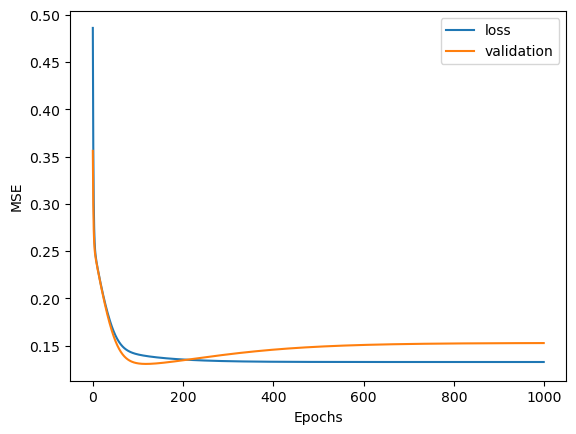

In [42]:
# Treinar a rede neural
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)


# Arredondar as previsões para 0 ou 1
rounded_predictions = np.round(y_pred)

# Calcular a acurácia

accuracy = accuracy_score(y_test, rounded_predictions)
# f1 score
#f1 = f1_score(y_test, rounded_predictions)
# Imprimir a acurácia
print("Accuracy:", accuracy)
#Imiprimir mse
print("Test error: ",mean_squared_error(y_test, y_pred))
#Imiprimir f1_score
#print("f1_score:", f1)

nn.plot_learning()
plt.xlabel('Epochs')
plt.ylabel('MSE')

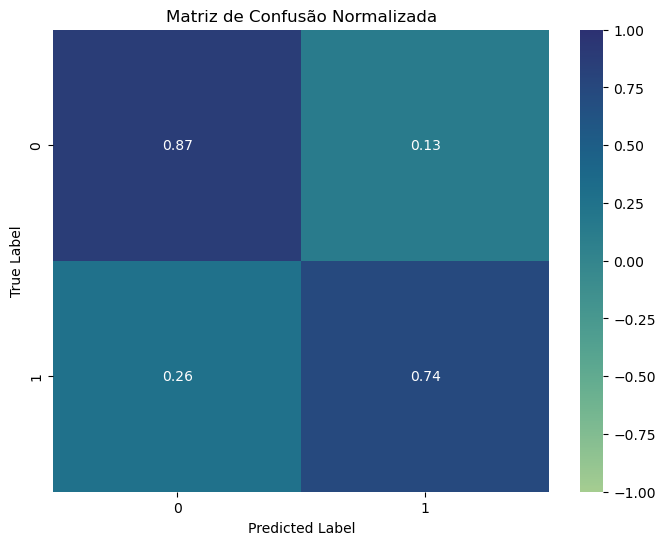

In [43]:
cm = confusion_matrix(y_test, rounded_predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True,cmap='crest', fmt=".2f", xticklabels=['0', '1'], yticklabels=['0', '1'],vmax=1,vmin=-1)
plt.title('Matriz de Confusão Normalizada')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
nn.print_parameters()

Layer 1:
Weights:
[[-0.15883228 -0.09642956 -0.42334338 -0.30275209  0.0493079 ]
 [-0.06994223 -0.05291524 -0.15612106 -0.00505727  0.09616452]
 [ 0.01194053 -0.04412332  0.05399941 -0.11974493  0.02079204]
 [-0.13183863 -0.00367738 -0.12590995 -0.01192431  0.08325965]
 [-0.11113504 -0.04394923  0.02153942 -0.06912979  0.08840514]]

Biases:
[[0.99973492 0.9999237  0.99944264 0.99965098 1.00033072]]

Layer 2:
Weights:
[[-0.10534308]
 [-0.02582516]
 [-0.35582464]
 [-0.21625297]
 [ 0.19556878]]

Biases:
[[1.0011764]]

